In [36]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [37]:
 housing_data = pd.read_csv("housing.csv")

In [38]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

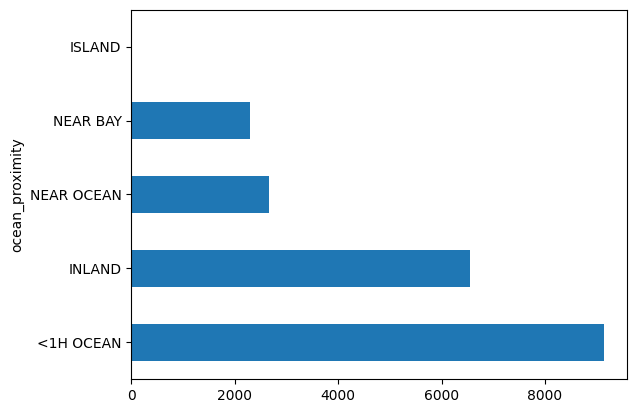

In [40]:
housing_data["ocean_proximity"].value_counts().plot(kind='barh')

In [41]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

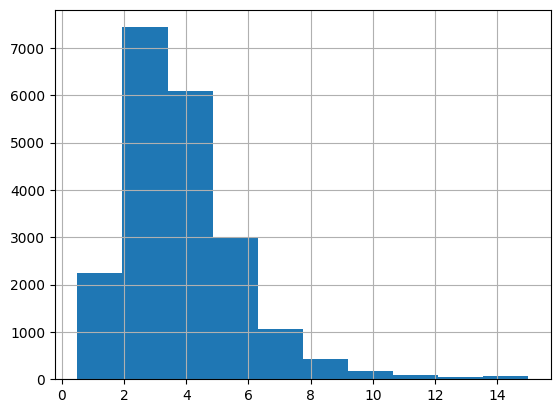

In [42]:
housing_data["median_income"].hist()

In [55]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.8, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

housing_data["income_cat"].value_counts()

,count
income_cat,
2,10903
4,3639
3,2914
5,2362
1,822


<Axes: >

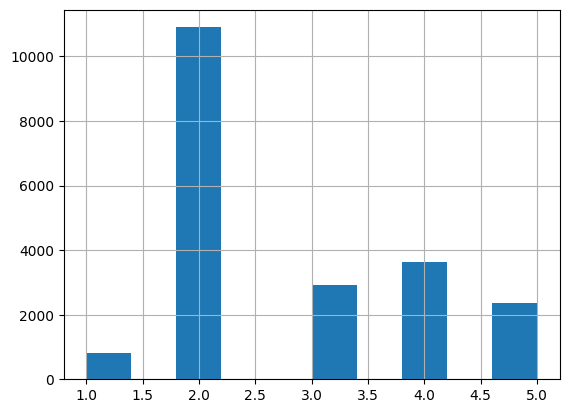

In [56]:
housing_data["income_cat"].hist()

In [57]:
y = housing_data["median_house_value"]
x = housing_data.drop(["median_house_value", "income_cat"], axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15349,-117.26,33.26,9.0,4609.0,798.0,2582.0,746.0,4.3429,<1H OCEAN
3341,-122.68,38.76,29.0,994.0,226.0,302.0,117.0,2.3125,INLAND
15062,-116.96,32.80,16.0,3920.0,1094.0,2612.0,1023.0,1.3291,<1H OCEAN
18371,-121.88,37.24,24.0,4420.0,996.0,2981.0,975.0,3.5060,<1H OCEAN
11403,-117.92,33.73,14.0,5147.0,1182.0,3171.0,1126.0,3.9929,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15946,-122.44,37.72,52.0,2890.0,571.0,1769.0,541.0,3.8274,NEAR BAY
11835,-120.96,39.12,24.0,2069.0,436.0,909.0,374.0,2.5326,INLAND
20029,-119.03,36.08,19.0,2736.0,549.0,1432.0,503.0,2.6944,INLAND
6790,-118.15,34.10,36.0,3514.0,818.0,2277.0,828.0,3.1211,<1H OCEAN


<Axes: >

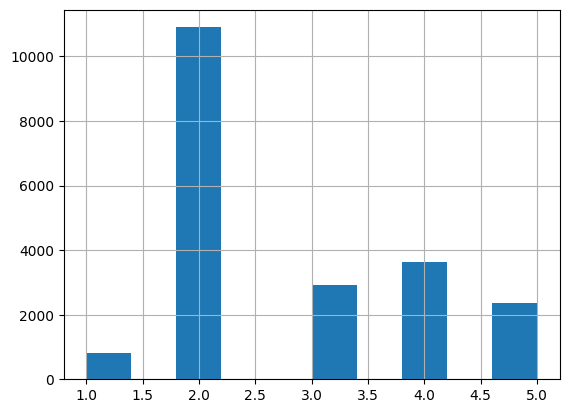

In [59]:
housing_data["income_cat"].hist()

<Axes: >

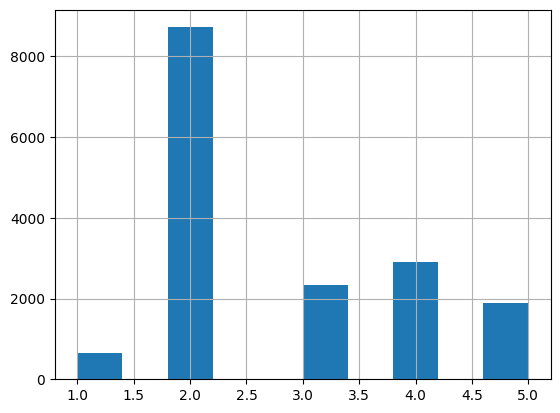

In [65]:
strat_train_set["income_cat"].hist()

Stratfied split

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [62]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
2,0.528343
4,0.176357
3,0.141231
5,0.114341
1,0.039729


In [63]:
housing_data["income_cat"].value_counts() / len(housing_data)

,count
income_cat,
2,0.528246
4,0.176308
3,0.141182
5,0.114438
1,0.039826


In [64]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.528246,0.528343,0.538275,1.898560,0.018344
3,0.141182,0.141231,0.144622,2.436513,0.034317
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [66]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

Visualizing our Data

In [67]:
housing = strat_train_set.copy()

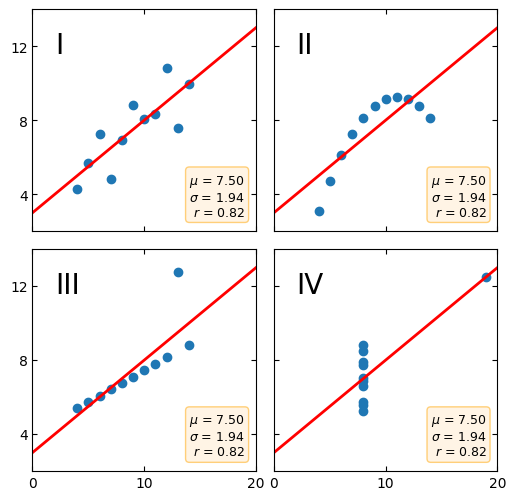

In [68]:


x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

Histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

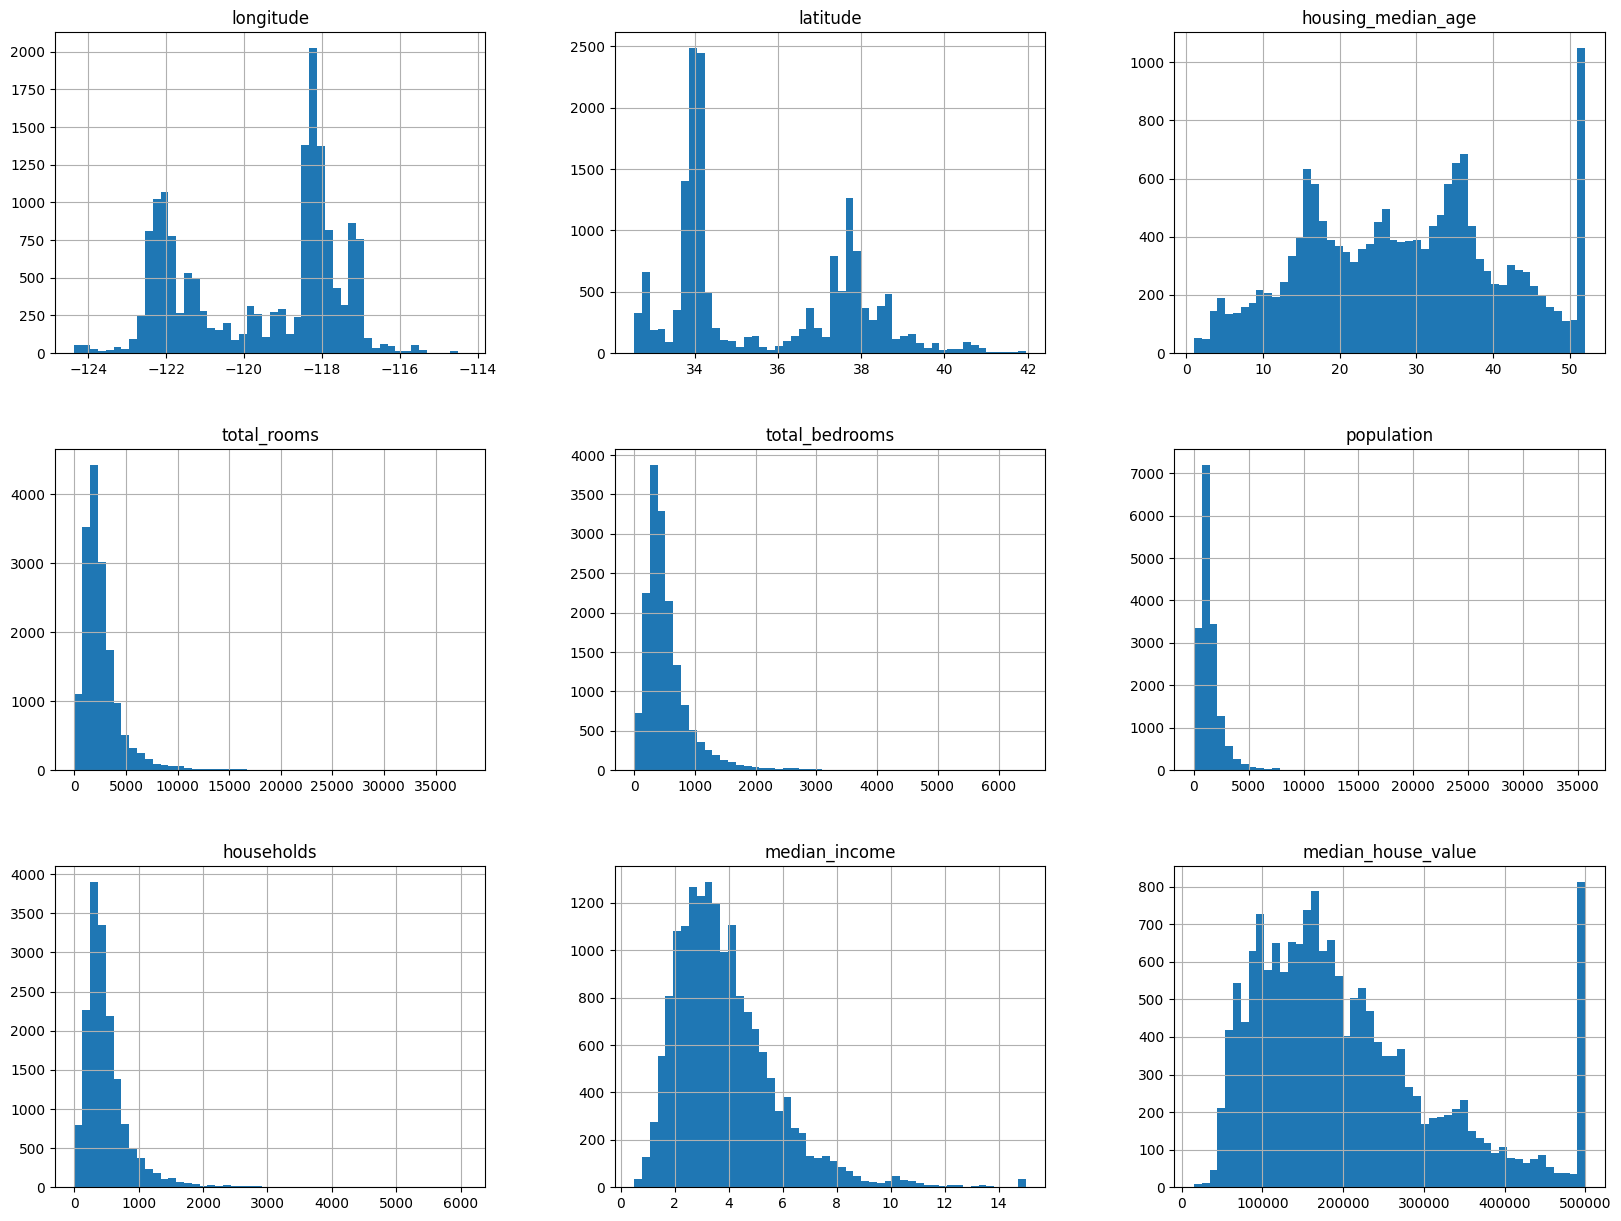

In [69]:
housing.hist(bins=50, figsize=(20, 15))

<Axes: >

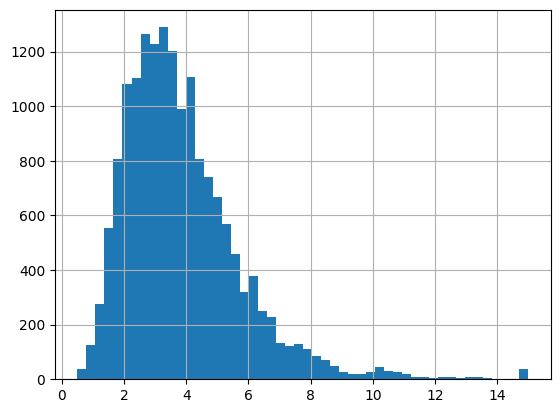

In [70]:
housing["median_income"].hist(bins=50)

Geographic Data

<Axes: xlabel='longitude', ylabel='latitude'>

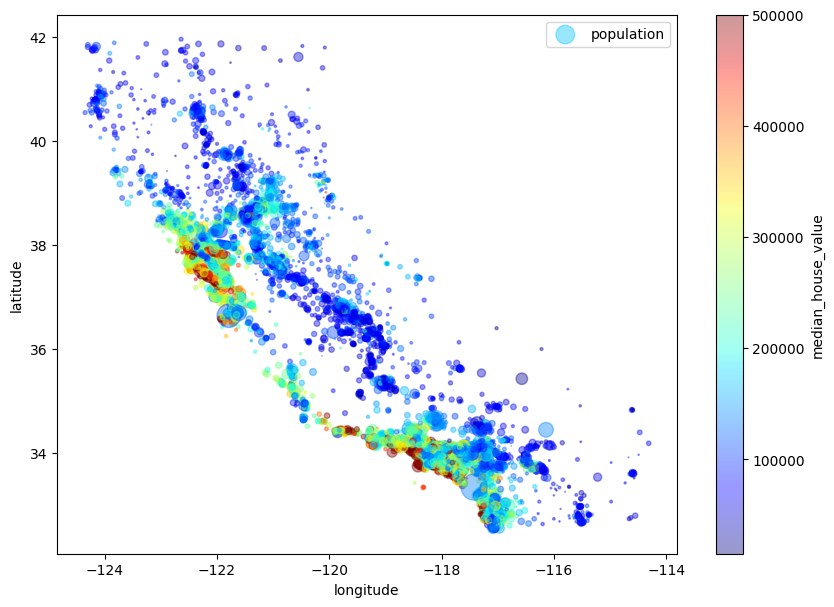

In [71]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Correlation Matrices

In [73]:
housing.drop("ocean_proximity", axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925806,-0.108434,0.045753,0.071812,0.101299,0.057366,-0.020698,-0.047479
latitude,-0.925806,1.000000,0.013931,-0.036499,-0.068265,-0.109403,-0.071685,-0.073309,-0.140915
housing_median_age,-0.108434,0.013931,1.000000,-0.363156,-0.323412,-0.298795,-0.306839,-0.122193,0.104116
total_rooms,0.045753,-0.036499,-0.363156,1.000000,0.931116,0.855410,0.920381,0.202262,0.136078
total_bedrooms,0.071812,-0.068265,-0.323412,0.931116,1.000000,0.876003,0.980482,-0.004975,0.049979
population,0.101299,-0.109403,-0.298795,0.855410,0.876003,1.000000,0.904908,0.006319,-0.023965
households,0.057366,-0.071685,-0.306839,0.920381,0.980482,0.904908,1.000000,0.015993,0.065465
median_income,-0.020698,-0.073309,-0.122193,0.202262,-0.004975,0.006319,0.015993,1.000000,0.688956
median_house_value,-0.047479,-0.140915,0.104116,0.136078,0.049979,-0.023965,0.065465,0.688956,1.000000


In [74]:
import seaborn as sns

<Axes: >

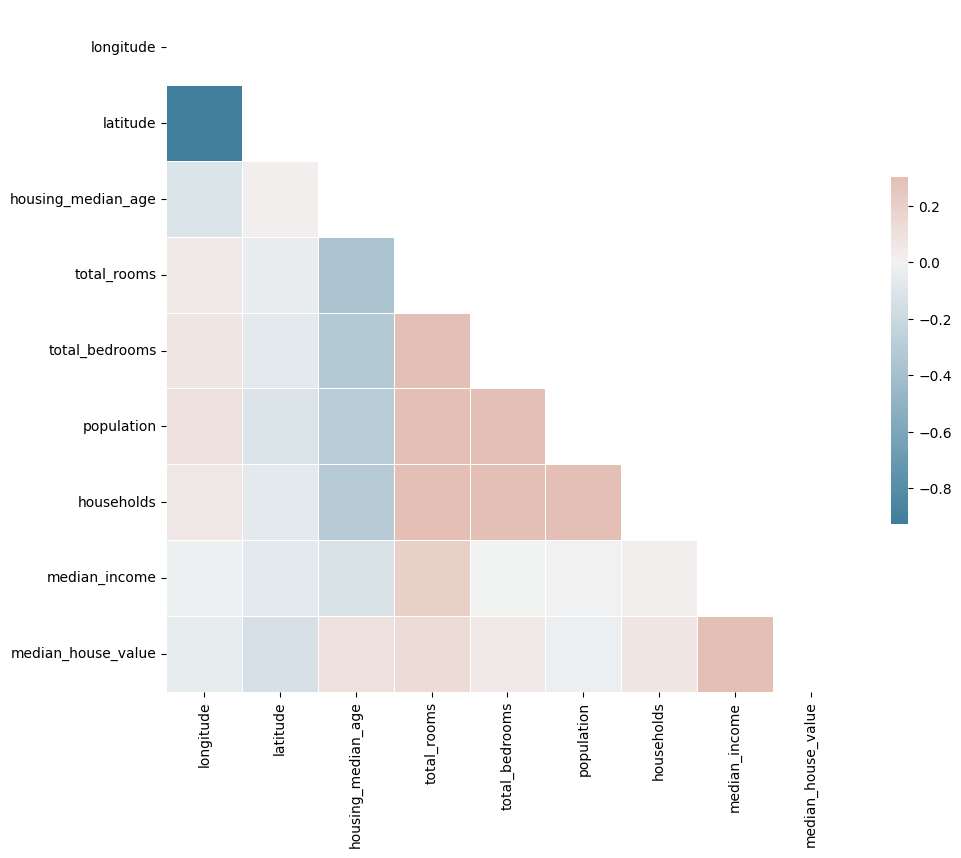

In [76]:
corr = housing.drop("ocean_proximity", axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Preparing Data for Machine Learning

In [77]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Dealing with Missing Values

In [78]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,INLAND
14307,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,NEAR OCEAN
14521,-117.14,32.90,16.0,3217.0,NaN,2054.0,687.0,4.2234,<1H OCEAN
14386,-117.23,32.75,5.0,1824.0,NaN,892.0,426.0,3.4286,NEAR OCEAN


In [80]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [81]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
19559,-120.98,37.60,36.0,1437.0,1073.0,320.0,2.1779,INLAND
14307,-117.14,32.71,52.0,500.0,480.0,108.0,1.8696,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,381.0,201.0,3.0726,NEAR OCEAN
14521,-117.14,32.90,16.0,3217.0,2054.0,687.0,4.2234,<1H OCEAN
14386,-117.23,32.75,5.0,1824.0,892.0,426.0,3.4286,NEAR OCEAN


In [82]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

/tmp/ipython-input-3907893688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19559,-120.98,37.60,36.0,1437.0,434.0,1073.0,320.0,2.1779,INLAND
14307,-117.14,32.71,52.0,500.0,434.0,480.0,108.0,1.8696,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,434.0,381.0,201.0,3.0726,NEAR OCEAN
14521,-117.14,32.90,16.0,3217.0,434.0,2054.0,687.0,4.2234,<1H OCEAN
14386,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286,NEAR OCEAN


In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [84]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11880,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450
17516,-121.93,37.33,44.0,2142.0,358.0,846.0,375.0,5.4273
5017,-118.33,34.00,47.0,825.0,187.0,416.0,173.0,2.3333
9861,-121.86,36.60,33.0,1409.0,307.0,633.0,290.0,3.5568
20467,-118.75,34.27,25.0,3371.0,502.0,1717.0,506.0,6.1253
...,...,...,...,...,...,...,...,...
1508,-122.05,37.92,14.0,12713.0,2558.0,4741.0,2412.0,4.7094
17488,-119.82,34.44,16.0,1414.0,463.0,793.0,439.0,3.6034
2129,-119.72,36.80,15.0,3045.0,689.0,1340.0,588.0,3.1953
14587,-117.18,32.83,23.0,2105.0,525.0,1218.0,484.0,3.3750


In [85]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [86]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11880,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450
17516,-121.93,37.33,44.0,2142.0,358.0,846.0,375.0,5.4273
5017,-118.33,34.00,47.0,825.0,187.0,416.0,173.0,2.3333
9861,-121.86,36.60,33.0,1409.0,307.0,633.0,290.0,3.5568
20467,-118.75,34.27,25.0,3371.0,502.0,1717.0,506.0,6.1253
...,...,...,...,...,...,...,...,...
1508,-122.05,37.92,14.0,12713.0,2558.0,4741.0,2412.0,4.7094
17488,-119.82,34.44,16.0,1414.0,463.0,793.0,439.0,3.6034
2129,-119.72,36.80,15.0,3045.0,689.0,1340.0,588.0,3.1953
14587,-117.18,32.83,23.0,2105.0,525.0,1218.0,484.0,3.3750


In [87]:
imputer.strategy

'median'

Encode Categorical Variables

In [88]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
11880,INLAND
17516,<1H OCEAN
5017,<1H OCEAN
9861,<1H OCEAN
20467,<1H OCEAN
10193,<1H OCEAN
16089,NEAR OCEAN
12902,INLAND
8938,<1H OCEAN
18781,INLAND


In [89]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.]])

In [91]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot# Creates a "dense array" meaning that all instances have a value not just the ones that are encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Feature Engineering

In [92]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [93]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
11880,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,1.034325,2.169336,5.347826
17516,-121.93,37.33,44.0,2142.0,358.0,846.0,375.0,5.4273,0.954667,2.256000,5.712000
5017,-118.33,34.00,47.0,825.0,187.0,416.0,173.0,2.3333,1.080925,2.404624,4.768786
9861,-121.86,36.60,33.0,1409.0,307.0,633.0,290.0,3.5568,1.058621,2.182759,4.858621
20467,-118.75,34.27,25.0,3371.0,502.0,1717.0,506.0,6.1253,0.992095,3.393281,6.662055
...,...,...,...,...,...,...,...,...,...,...,...
1508,-122.05,37.92,14.0,12713.0,2558.0,4741.0,2412.0,4.7094,1.060531,1.965589,5.270730
17488,-119.82,34.44,16.0,1414.0,463.0,793.0,439.0,3.6034,1.054670,1.806378,3.220957
2129,-119.72,36.80,15.0,3045.0,689.0,1340.0,588.0,3.1953,1.171769,2.278912,5.178571
14587,-117.18,32.83,23.0,2105.0,525.0,1218.0,484.0,3.3750,1.084711,2.516529,4.349174


Scaling our Data

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[ 1.08518693, -0.76980662,  0.6653609 , ..., -0.12845457,
        -0.08819956, -0.02938949],
       [-1.17909589,  0.79916181,  1.22161216, ..., -0.29421995,
        -0.07943802,  0.11638851],
       [ 0.61637066, -0.76043965,  1.46000555, ..., -0.03148219,
        -0.06441237, -0.26117788],
       ...,
       [-0.07687892,  0.55093695, -1.08285734, ...,  0.15755989,
        -0.0771217 , -0.09714175],
       [ 1.18992248, -1.30840773, -0.44714162, ..., -0.02360392,
        -0.053099  , -0.42914786],
       [-1.03944849,  0.48536812,  1.06268323, ..., -0.0985633 ,
        -0.05344479, -0.04068813]])

In [97]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse_output=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

Select and Train Model

In [98]:
train_data, train_labels, features= data_transformations(strat_train_set)
train_data

array([[ 1.08518693, -0.76980662,  0.6653609 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.17909589,  0.79916181,  1.22161216, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61637066, -0.76043965,  1.46000555, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07687892,  0.55093695, -1.08285734, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18992248, -1.30840773, -0.44714162, ...,  0.        ,
         0.        ,  1.        ],
       [-1.03944849,  0.48536812,  1.06268323, ...,  0.        ,
         0.        ,  0.        ]])

In [99]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [100]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.16779409,  0.48880795, -1.24628363, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02247896,  0.42801889, -0.53138361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93389349, -0.76438183, -0.92855029, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.61343361, -0.81114265, -0.76968362, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18414603,  0.73664026,  0.66011642, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12917373, -0.83919914, -1.16685029, ...,  0.        ,
         0.        ,  0.        ]])

Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)

LinearRegression()

In [102]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
2400,100000.0,65388.220736,34611.779264
2443,55300.0,48634.761921,6665.238079
13214,161800.0,206727.094287,-44927.094287
14649,137500.0,210349.144125,-72849.144125
13254,251100.0,217074.933426,34025.066574


In [103]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(44103.395376416)

In [104]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

38615.66446570181

DecisionTreeRegressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [106]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels,                      scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [108]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66184.55743339 70994.93393441 74167.77210124 72554.10892922
 67961.54676494 74946.99386129 71806.95527234 70627.23516193
 69107.62735043 74324.18082892]
Mean: 71267.59116380967
Standard deviation: 2741.43828280197


RandomForestRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [110]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18694.544572445582)

In [111]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50523.66837897 51883.96439064 49615.42057296 50312.30860321
 47375.15080757 50984.64621581 51517.82409952 48758.81456247
 48314.69873286 54190.66139791]
Mean: 50347.71577619166
Standard deviation: 1869.9064639491605


In [112]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

,0
count,10.000000
mean,68642.691130
std,2585.478226
min,65611.016957
25%,66461.891633
50%,68408.471056
75%,69456.548581
max,73325.255214
